## Пример решения задачи регрессии

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[0.12353246],
       [0.15718164],
       [0.45452892],
       [0.59507236],
       [0.59820857]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.12321851,  0.15653521,  0.43903911,  0.56056868,  0.56316304,
        0.67632645,  0.91651265,  0.93289495,  0.96088866,  0.99108157,
        0.99963998,  0.99854529,  0.99790843,  0.98819181,  0.9853501 ,
        0.68959534,  0.67049058,  0.57225448,  0.47382545,  0.39408996,
        0.33567608,  0.32242638,  0.23468241,  0.16821167, -0.0275436 ,
       -0.1771763 , -0.19047972, -0.23597727, -0.27850796, -0.32116709,
       -0.4169798 , -0.57334088, -0.58801872, -0.83357817, -0.97549135,
       -0.9794207 , -0.9999266 , -0.99481961, -0.97122939, -0.96960455])

In [5]:
np.sin( X )[:5]

array([[0.12321851],
       [0.15653521],
       [0.43903911],
       [0.56056868],
       [0.56316304]])

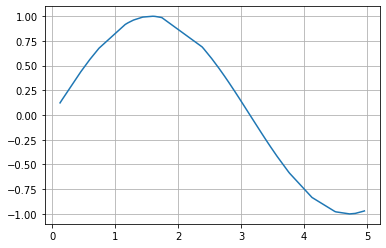

In [6]:
plt.plot( X, y )
plt.grid()
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

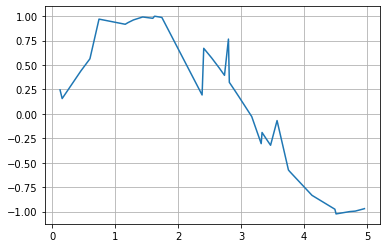

In [8]:
plt.plot( X, y )
plt.grid()
plt.show();

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [10]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [11]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [12]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

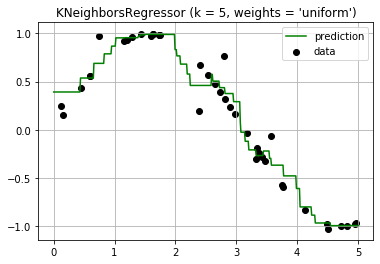

In [13]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.grid()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

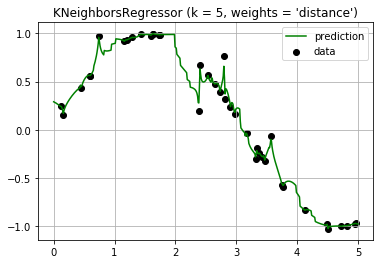

In [14]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.grid()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()